### Machine Learning Review and ANN Introduction

In [1]:
import numpy as np

In [2]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

In [3]:
#logic or example
X

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

In [4]:
y = np.array([0, 1, 1, 1])

In [5]:
b = np.ones((X.shape[0],))*-1

In [6]:
b

array([-1., -1., -1., -1.])

In [7]:
X = np.concatenate((b.reshape(4, 1), X), axis = 1)

In [8]:
X

array([[-1.,  0.,  0.],
       [-1.,  0.,  1.],
       [-1.,  1.,  0.],
       [-1.,  1.,  1.]])

In [9]:
w = np.array([-0.05, -0.02, 0.02])

In [10]:
X@w

array([0.05, 0.07, 0.03, 0.05])

In [11]:
np.where(X@w > 0, 1, 0)

array([1, 1, 1, 1])

### weight update

$$w_{i + 1} = w_i - \alpha(y - \hat{y})x_i$$

In [12]:
alpha = 0.1

In [13]:
y - np.where(X@w > 0, 1, 0)

array([-1,  0,  0,  0])

In [14]:
for i in range(10):
    prod = X@w
    preds = np.where(prod > 0, 1, 0)
    w += alpha*(y - preds)@X
    print(preds)

[1 1 1 1]
[0 0 0 0]
[1 1 1 1]
[1 1 1 1]
[1 1 1 1]
[0 1 1 1]
[0 1 1 1]
[0 1 1 1]
[0 1 1 1]
[0 1 1 1]


### Larger Example

In [15]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [16]:
X, y = make_blobs(centers = 2, center_box = (-3, 3), random_state = 22)

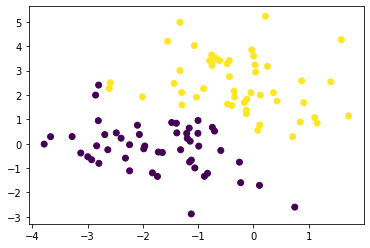

In [17]:
plt.scatter(X[:, 0], X[:, 1], c = y)

In [18]:
w = np.array([0., 0., 0.])
ones = np.ones((X.shape[0], 1))
X = np.concatenate((ones, X), axis = 1)

for i in range(50):
    prod = X@w
    preds = np.where(prod > 0, 1, 0)
    w += alpha*(y - preds)@X

In [19]:
preds

array([1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0])

In [20]:
from sklearn.metrics import accuracy_score

In [21]:
accuracy_score(y, preds)

1.0

In [22]:
w

array([-1.4       ,  7.85617133,  9.69891443])

### Perceptron

In [23]:
from sklearn.linear_model import Perceptron

In [24]:
clf = Perceptron()

In [25]:
clf.fit(X, y)

Perceptron()

In [26]:
clf.score(X, y)

0.99

In [27]:
from sklearn.neural_network import MLPRegressor

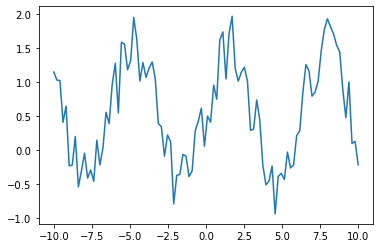

In [28]:
x = np.linspace(-10, 10, 100)
y = np.sin(x) + np.random.random(100)
plt.plot(x, y)

In [29]:
mlp = MLPRegressor(max_iter = 1000)

In [30]:
mlp.fit(x.reshape(-1, 1), y)

MLPRegressor(max_iter=1000)

In [31]:
preds = mlp.predict(x.reshape(-1, 1))

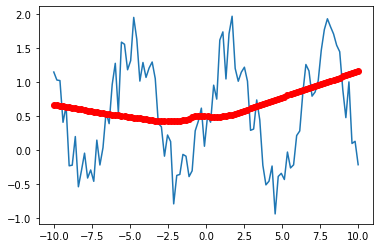

In [32]:
plt.plot(x, y)
plt.plot(x, preds, 'ro')

### Using `keras`

In [33]:
#!pip install keras
#!pip install tensorflow

In [34]:
from keras.models import Sequential
from keras.layers import Dense

In [35]:
model = Sequential()

In [36]:
model.add(Dense(10, activation = 'relu'))
model.add(Dense(1))

In [37]:
model.compile(loss = 'mae', metrics = ['mse'])

In [38]:
history = model.fit(X, y, epochs = 20)

Epoch 1/20
4/4 [==============================] - 0s 573us/step - loss: 0.9602 - mse: 1.4223
Epoch 2/20
4/4 [==============================] - 0s 493us/step - loss: 0.9069 - mse: 1.2980
Epoch 3/20
4/4 [==============================] - 0s 501us/step - loss: 0.8841 - mse: 1.2376
Epoch 4/20
4/4 [==============================] - 0s 438us/step - loss: 0.8615 - mse: 1.1871
Epoch 5/20
4/4 [==============================] - 0s 503us/step - loss: 0.8481 - mse: 1.1543
Epoch 6/20
4/4 [==============================] - 0s 431us/step - loss: 0.8334 - mse: 1.1180
Epoch 7/20
4/4 [==============================] - 0s 430us/step - loss: 0.8153 - mse: 1.0804
Epoch 8/20
4/4 [==============================] - 0s 565us/step - loss: 0.8044 - mse: 1.0558
Epoch 9/20
4/4 [==============================] - 0s 464us/step - loss: 0.7969 - mse: 1.0393
Epoch 10/20
4/4 [==============================] - 0s 615us/step - loss: 0.7869 - mse: 1.0158
Epoch 11/20
4/4 [==============================] - 0s 469us/step - lo

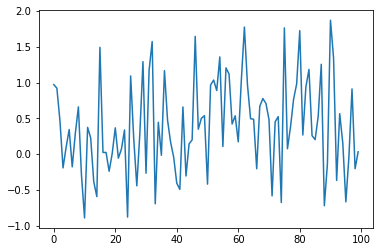

In [39]:
plt.plot(model.predict(X))

In [40]:
from keras.utils import plot_model

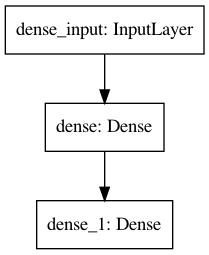

In [43]:
plot_model(model, expand_nested=True)

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                40        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________


In [45]:
import seaborn as sns

In [46]:
titanic = sns.load_dataset('titanic')

In [47]:
titanic.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

In [51]:
titanic = titanic.dropna()

In [68]:
y = titanic.survived

In [69]:
X = titanic.drop('survived', axis = 1).select_dtypes(['float', 'int'])

In [70]:
X

pclass   age  sibsp  parch     fare
1         1  38.0      1      0  71.2833
3         1  35.0      1      0  53.1000
6         1  54.0      0      0  51.8625
10        3   4.0      1      1  16.7000
11        1  58.0      0      0  26.5500
..      ...   ...    ...    ...      ...
871       1  47.0      1      1  52.5542
872       1  33.0      0      0   5.0000
879       1  56.0      0      1  83.1583
887       1  19.0      0      0  30.0000
889       1  26.0      0      0  30.0000

[182 rows x 5 columns]

- choose the correct loss function
- make sure your last layers uses the right activation (and has correct size!)

In [76]:
model2 = Sequential()
model2.add(Dense(32, activation = 'relu', input_shape = (X.shape[1], )))
model2.add(Dense(1, activation = 'sigmoid'))

In [77]:
model2.compile(loss = 'binary_crossentropy', metrics = ['acc'])

In [78]:
y.shape

(182,)

In [79]:
X.shape

(182, 5)

In [82]:
history = model2.fit(X, y, epochs = 20)

Epoch 1/20
6/6 [==============================] - 0s 477us/step - loss: 0.7021 - acc: 0.6264
Epoch 2/20
6/6 [==============================] - 0s 467us/step - loss: 0.6618 - acc: 0.7033
Epoch 3/20
6/6 [==============================] - 0s 547us/step - loss: 0.6798 - acc: 0.6429
Epoch 4/20
6/6 [==============================] - 0s 496us/step - loss: 0.6430 - acc: 0.6813
Epoch 5/20
6/6 [==============================] - 0s 460us/step - loss: 0.6521 - acc: 0.6758
Epoch 6/20
6/6 [==============================] - 0s 547us/step - loss: 0.6272 - acc: 0.6868
Epoch 7/20
6/6 [==============================] - 0s 611us/step - loss: 0.6369 - acc: 0.6593
Epoch 8/20
6/6 [==============================] - 0s 468us/step - loss: 0.6461 - acc: 0.6374
Epoch 9/20
6/6 [==============================] - 0s 460us/step - loss: 0.6215 - acc: 0.6758
Epoch 10/20
6/6 [==============================] - 0s 544us/step - loss: 0.6084 - acc: 0.7088
Epoch 11/20
6/6 [==============================] - 0s 500us/step - lo